In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 5

In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
data = pd.read_csv('AirPassengers.csv')
print (data.head())
print( '\n Data Types:')
print(data.dtypes)

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

 Data Types:
Month          object
#Passengers     int64
dtype: object


In [4]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)
print (data.head())

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


In [5]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [7]:
ts = data['#Passengers']
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [8]:
ts['1949-02-01']

118

In [9]:
from datetime import datetime
ts[datetime(1949,2,1)]

118

In [10]:
ts['1949-01-01':'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [11]:
ts[:'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [12]:
ts["1949"]

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

In [13]:
ts["1950"]

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

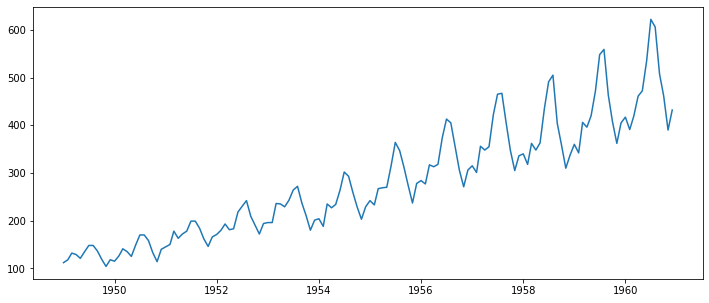

In [14]:
plt.figure(figsize=(12,5))
plt.plot(ts)

In [15]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    
    plt.figure(figsize=(12,5))
    orig = plt.plot(timeseries, color='brown',label='Original')
    mean = plt.plot(rolmean, color='green', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
   
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

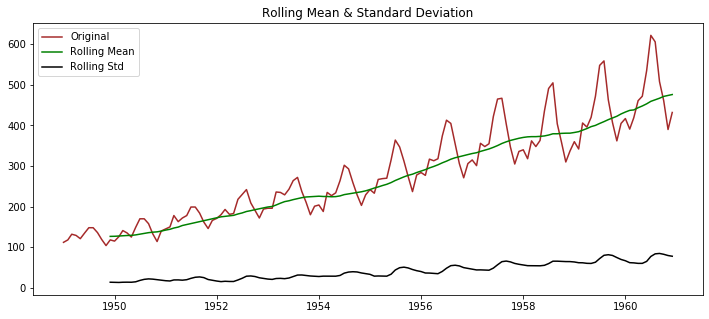

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [16]:
test_stationarity(ts)

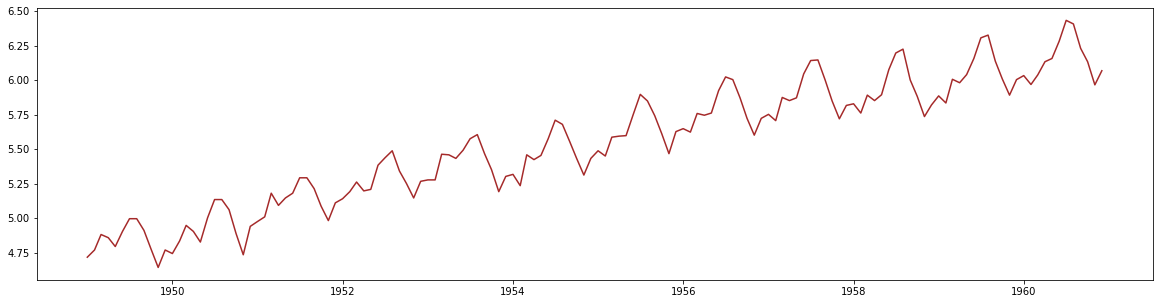

In [17]:
ts_log = np.log(ts)
plt.plot(ts_log,color="brown")

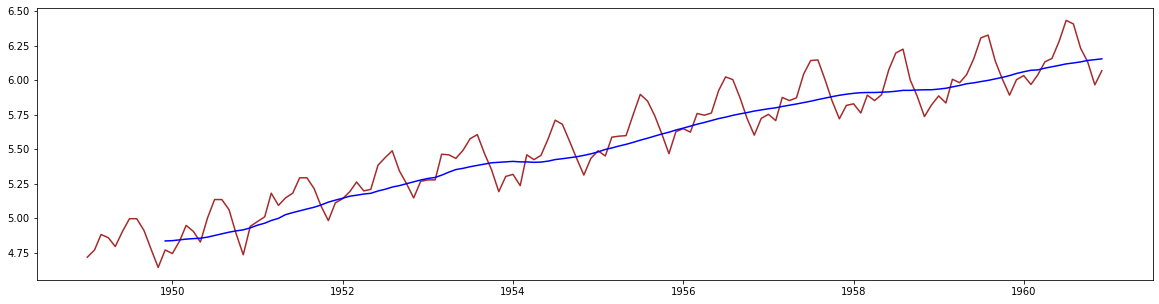

In [18]:
moving_avg = ts_log.rolling(window=12).mean()
plt.plot(ts_log,color="brown")
plt.plot(moving_avg, color='blue')

In [19]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head()

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
Name: #Passengers, dtype: float64

In [20]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
Name: #Passengers, dtype: float64

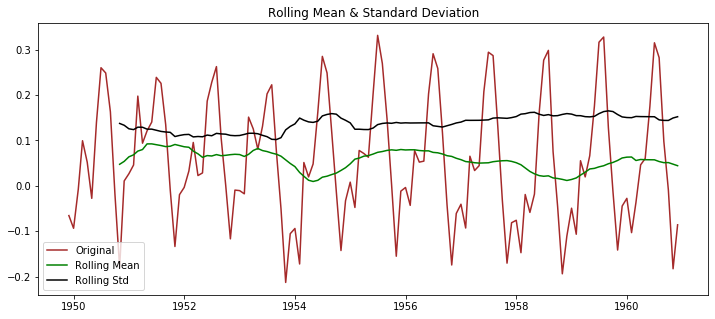

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [21]:
test_stationarity(ts_log_moving_avg_diff)

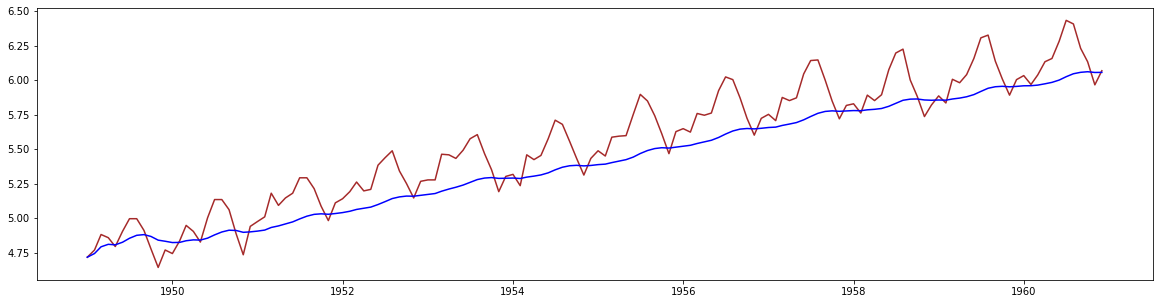

In [22]:
expwighted_avg = ts_log.ewm(halflife=12).mean()
plt.plot(ts_log,"brown")
plt.plot(expwighted_avg, color='blue')

In [23]:
expwighted_avg

Month
1949-01-01    4.718499
1949-02-01    4.745345
1949-03-01    4.793835
1949-04-01    4.811785
1949-05-01    4.808206
                ...   
1960-08-01    6.046445
1960-09-01    6.056778
1960-10-01    6.061079
1960-11-01    6.055750
1960-12-01    6.056461
Name: #Passengers, Length: 144, dtype: float64

In [24]:
ts_log

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: #Passengers, Length: 144, dtype: float64

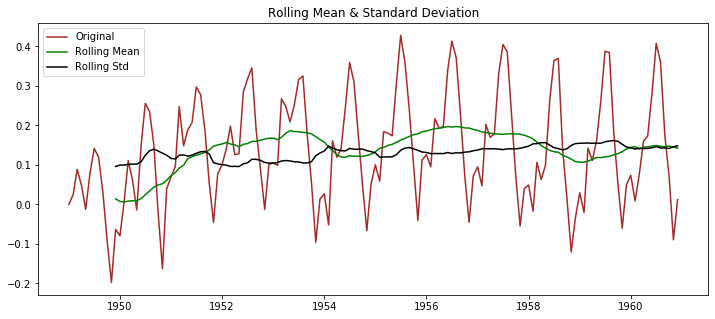

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [25]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

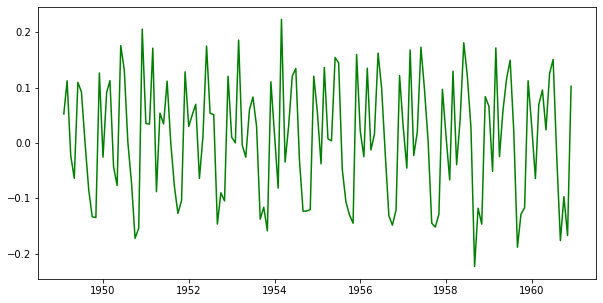

In [27]:
plt.figure(figsize=(10,5))
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff,color="green")

<Figure size 1080x720 with 0 Axes>

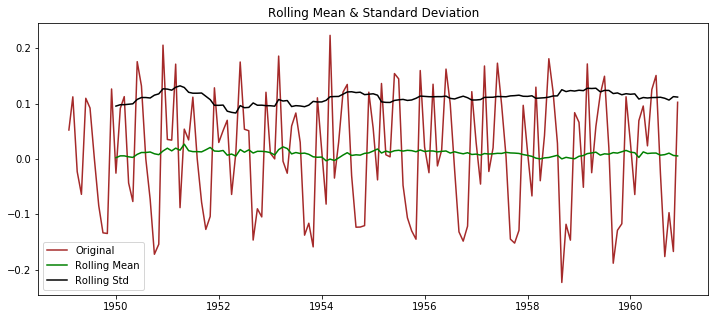

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [28]:
plt.figure(figsize=(15,10))
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

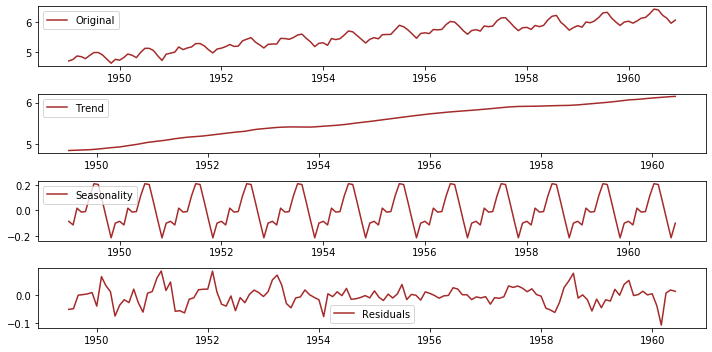

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10,5))
plt.subplot(411)
plt.plot(ts_log, label='Original',color="brown")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend',color='brown')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality',color="brown")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals',color='brown')
plt.legend(loc='best')
plt.tight_layout()

<Figure size 864x360 with 0 Axes>

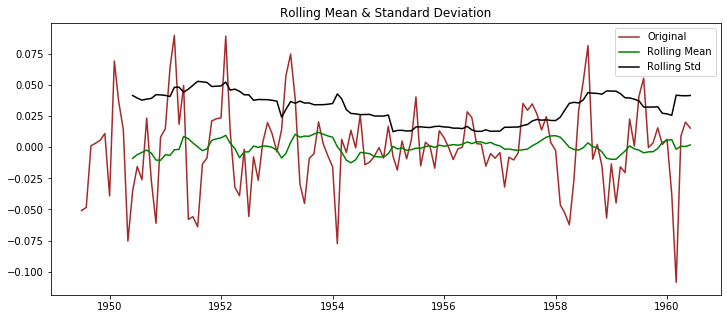

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [30]:
plt.figure(figsize=(12,5))
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [31]:
from statsmodels.tsa.arima_model import ARIMA

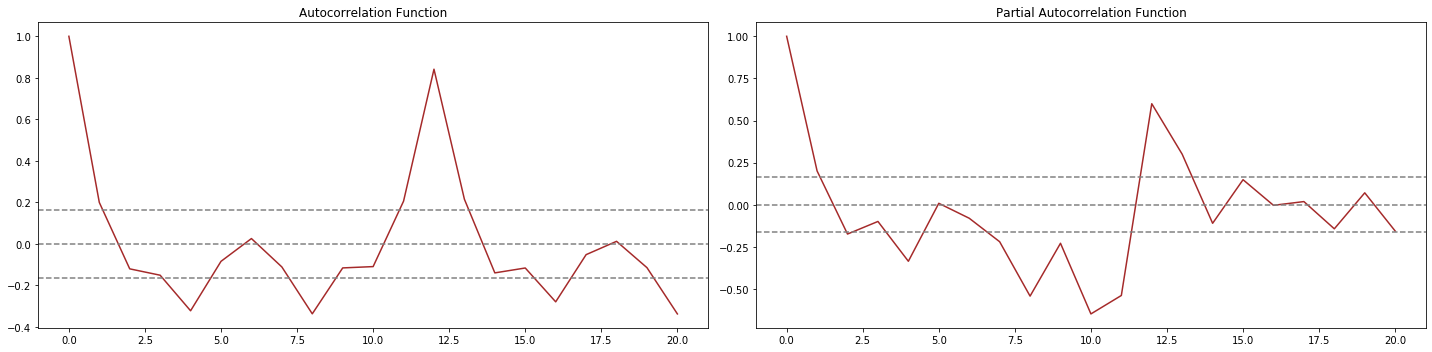

In [32]:
from statsmodels.tsa.stattools import acf, pacf  

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')


plt.subplot(121)    
plt.plot(lag_acf,color='brown')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')


plt.subplot(122)
plt.plot(lag_pacf,color="brown")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

C:\Users\DRAVYA\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\DRAVYA\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.5023')

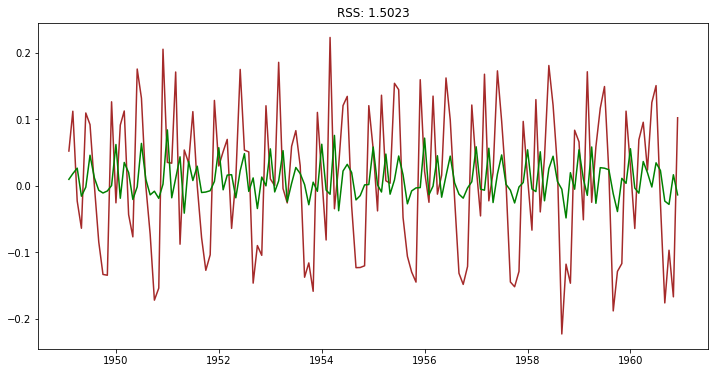

In [33]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.figure(figsize=(12,6))
plt.plot(ts_log_diff,color="brown")
plt.plot(results_AR.fittedvalues, color='green')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

C:\Users\DRAVYA\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\DRAVYA\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.4721')

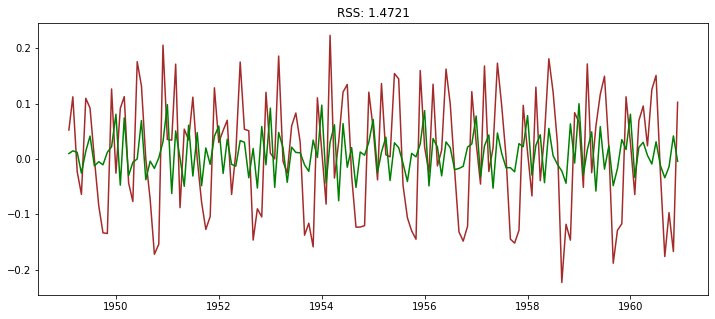

In [34]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.figure(figsize=(12,5))
plt.plot(ts_log_diff,color="brown")
plt.plot(results_MA.fittedvalues, color='green')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

C:\Users\DRAVYA\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\DRAVYA\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.0292')

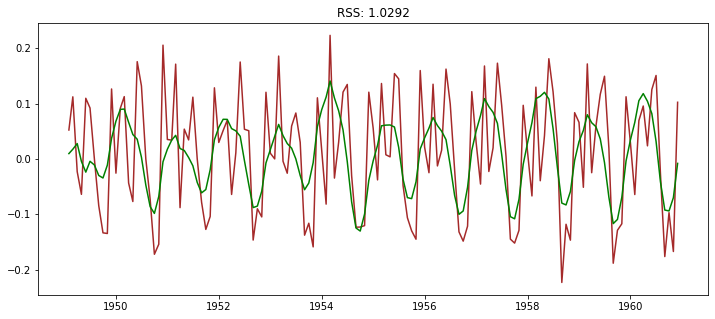

In [35]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  

plt.figure(figsize=(12,5))
plt.plot(ts_log_diff,color="brown")
plt.plot(results_ARIMA.fittedvalues, color='green')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [36]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [37]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [38]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

In [39]:
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

In [40]:
ts_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
Name: #Passengers, dtype: float64

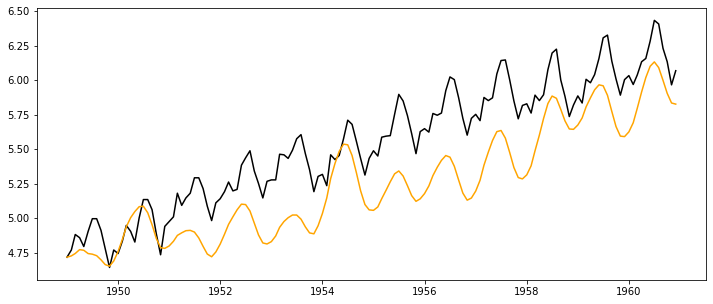

In [41]:
plt.figure(figsize=(12,5))
plt.plot(ts_log,"black")
plt.plot(predictions_ARIMA_log,color="orange")

Text(0.5, 1.0, 'RMSE: 90.1044')

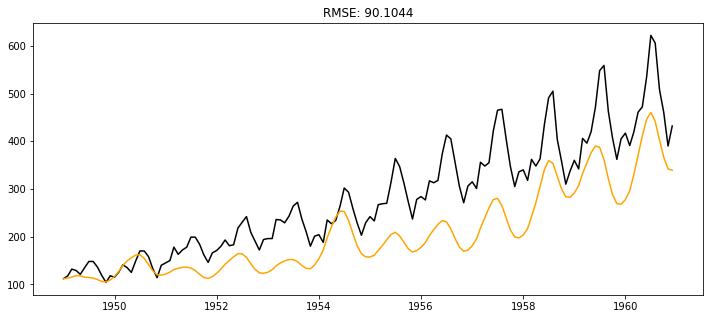

In [42]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)

plt.figure(figsize=(12,5))
plt.plot(ts,color="black")
plt.plot(predictions_ARIMA,color="orange")
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [43]:
predictions_ARIMA

Month
1949-01-01    112.000000
1949-02-01    113.078122
1949-03-01    115.073415
1949-04-01    118.301987
1949-05-01    117.768364
                 ...    
1960-08-01    441.886507
1960-09-01    402.905963
1960-10-01    366.753540
1960-11-01    341.984837
1960-12-01    339.216839
Length: 144, dtype: float64

In [44]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


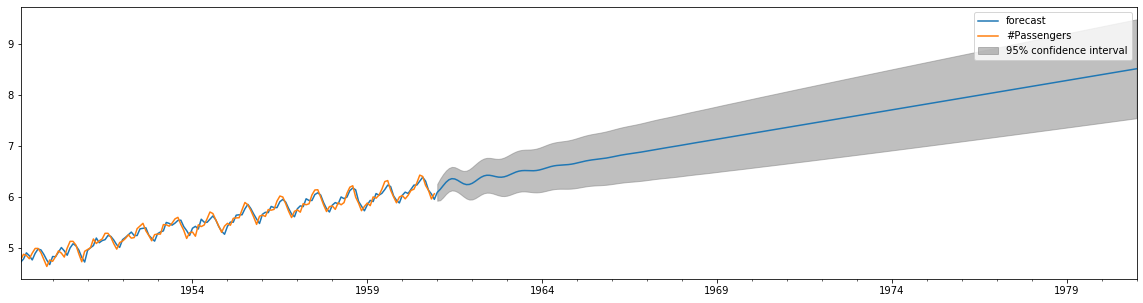

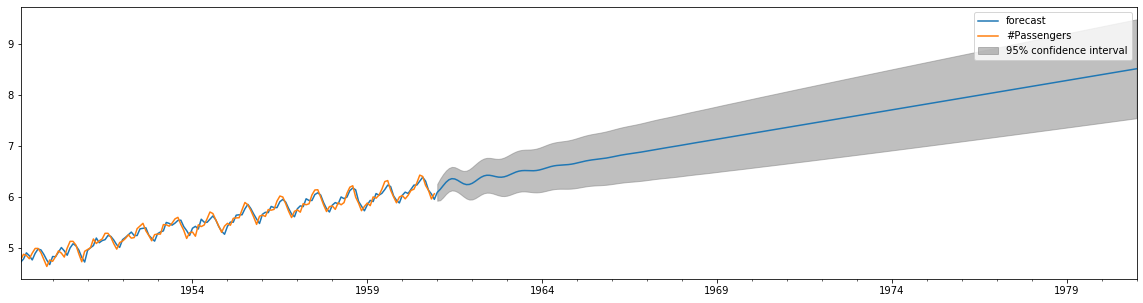

In [45]:
results_ARIMA.plot_predict(1,384)

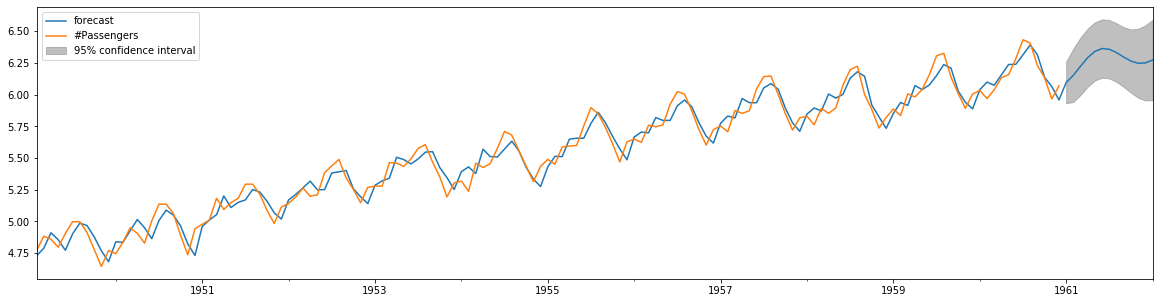

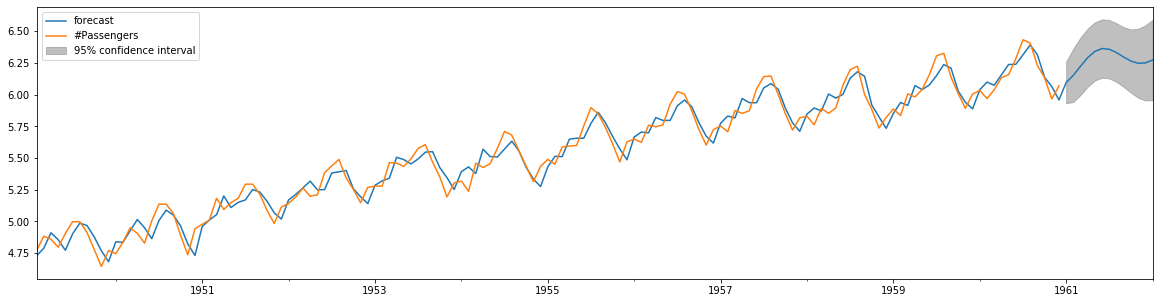

In [46]:
results_ARIMA.plot_predict(1,156)

In [47]:
x=results_ARIMA.forecast(steps=156)

In [48]:
x

(array([6.09553397, 6.15281411, 6.22442976, 6.29241112, 6.34164725,
        6.36359367, 6.35784689, 6.33139306, 6.29597542, 6.26447717,
        6.24738331, 6.2502518 , 6.27275846, 6.30940322, 6.35151502,
        6.38988663, 6.41727387, 6.43011058, 6.42906693, 6.41842493,
        6.4045616 , 6.39403622, 6.39183091, 6.40019513, 6.41833703,
        6.44295418, 6.46937445, 6.49293994, 6.51024126, 6.5198904 ,
        6.52267585, 6.52112394, 6.51864535, 6.51853699, 6.52311933,
        6.53322372, 6.54812882, 6.56591569, 6.5841032 , 6.6003655 ,
        6.61313276, 6.6219279 , 6.62737797, 6.63093138, 6.63438699,
        6.63937996, 6.64696517, 6.65739854, 6.67015338, 6.68414265,
        6.69806639, 6.71077913, 6.72157744, 6.73033995, 6.73749822,
        6.74386391, 6.75037336, 6.75782606, 6.76668697, 6.77699838,
        6.78841334, 6.80032869, 6.81207209, 6.82308774, 6.8330715 ,
        6.84202506, 6.85022326, 6.85811236, 6.86617355, 6.87479167,
        6.88416319, 6.89426401, 6.90487906, 6.91